In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 5.1 Gaussian emission probabilities

In [11]:
%run scripts/run_gmm_emission.py

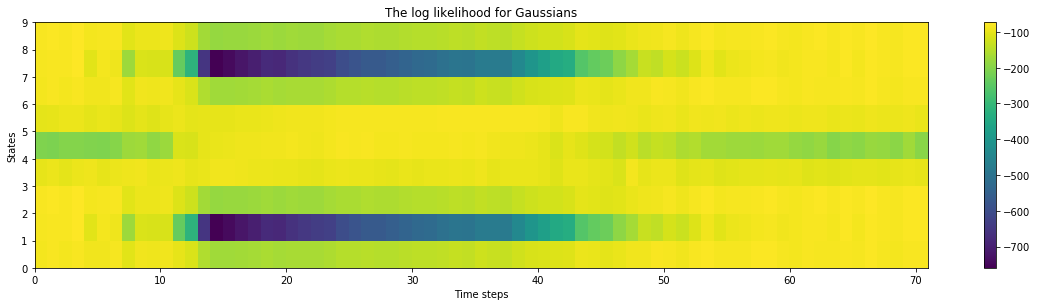

In [13]:
fig, ax = plt.subplots(figsize=(16, 4))
im = ax.pcolormesh(obsloglik.T)
fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.title("The log likelihood for Gaussians")
plt.xlabel("Time steps")
plt.ylabel("States")
plt.show()

> What can you say about the figure? Which Gaussian components give the high likelihood in which time steps? Why? Remember that each utterance starts and ends with silence

We can devide the features (lmfcc) into 3 parts. T = {1:10}, {11:50}, {51:71}

The first and the last part match states 0 to 2 and 6 to 8. They correspond to the slience states.

The middle part gives the highest probability at states 3, 4, and 5. These states correspond to the phoneme of 'o'


> What can you say about the figure? Which Gaussian components
give the high likelihood in which time steps? Why? Remember that each utterance starts and
ends with silence

# 5.2 Forward Algorithm

# 5.4 Backward Algorithm

>Derive the formula that computes $P(X|\theta)$ using the betas $\beta_n(i)$ instead of the alphas.

Consider $P(X_{0:N-1}, z_0 = s_i | \theta)$

$P(X_{0:N-1}, z_0 = s_i | \theta)$

= $P(X_0, z_0=s_i, X_{1:N-1} | \theta)$

= $P(X_0, z_0=s_i|\theta) P(X_{1:N-1}| \theta,X_0, z_0=s_i)$ (chain rule)
 
= $P(X_0, z_0=s_i|\theta) P(X_{1:N-1}| \theta, z_0=s_i)$ (Hidden Markov Property)

= $\alpha_0(i) \beta_0(i)$

= $\pi_i \phi_i(x_0) \beta_0(i)$

Therefore, $P(X|\theta)$ is 

$\sum_{i} \pi_i \phi_i(x_0) \beta_0(i)$

# 6.1 State posterior probabilities

In [2]:
%run scripts/run_state_post_prob.py

C:\Users\chris\gitlocal\kth\DT2119_SpeechRecognition\lab2\scripts\run_state_post_prob.py:24: RuntimeWarning: divide by zero encountered in log
  log_startprob = np.log(pi_vec)
C:\Users\chris\gitlocal\kth\DT2119_SpeechRecognition\lab2\scripts\run_state_post_prob.py:25: RuntimeWarning: divide by zero encountered in log
  log_transmat = np.log(trans_mat)


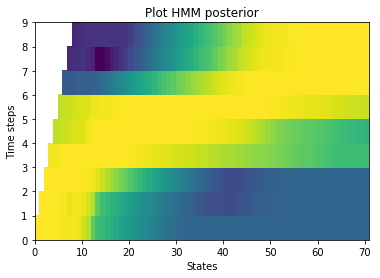

In [3]:
plt.pcolormesh(log_gamma.T)
plt.title("Plot HMM posterior")
plt.ylabel('Time steps')
plt.xlabel('States')
plt.show()

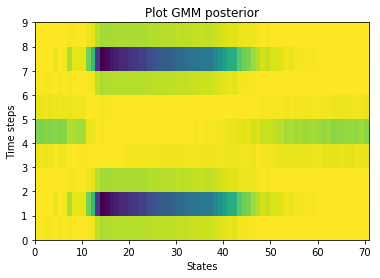

In [4]:
plt.pcolormesh(log_gamma_gmm.T)
plt.title("Plot GMM posterior")
plt.ylabel('Time steps')
plt.xlabel('States')
plt.show()

>Compare the HMM and GMM posteriors. What is the difference? Why?

Non-informative prior makes no alignment between hidden states and the observation sequence / frames. 
In this case, the likelihood spreads out to restricted areas / states.

>Now sum the HMM posteriors (in linear domain) for each state along the time axis. What is
the meaning the the values you obtain?

The hits or the belief to states given the observation sequence

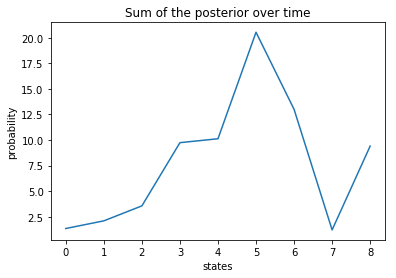

In [5]:
# the posterior of the states over the time
plt.plot(np.exp(logsumexp(log_gamma)))
plt.title("Sum of the posterior over time")
plt.xlabel('states')
plt.ylabel('probability')
plt.show()

>What about summing over both states and time steps?

The number of frames / time steps of the observation sequence

In [6]:
np.round(np.sum(np.exp(log_gamma)))

71.0

In [7]:
log_gamma.shape

(71, 9)

# 6.2 Retraining the emission probability distributions

In [9]:
%run scripts/run_retrain.py

C:\Users\chris\gitlocal\kth\DT2119_SpeechRecognition\lab2\scripts\run_retrain.py:76: RuntimeWarning: divide by zero encountered in log
  log_pi = np.log(pi_vec)
C:\Users\chris\gitlocal\kth\DT2119_SpeechRecognition\lab2\scripts\run_retrain.py:77: RuntimeWarning: divide by zero encountered in log
  log_trans = np.log(trans_mat)
C:\Users\chris\gitlocal\kth\DT2119_SpeechRecognition\lab2\scripts\run_retrain.py:21: RuntimeWarning: divide by zero encountered in log
  log_pi = np.log(startprob)
C:\Users\chris\gitlocal\kth\DT2119_SpeechRecognition\lab2\scripts\run_retrain.py:22: RuntimeWarning: divide by zero encountered in log
  log_trans = np.log(transmat)


The log likelihood of the digit 4: -7227.865033718987
Retrain HMM of digit 'o' with data[10]['lmfcc']
Iter 0: The log likelihood in EM: -7448.99128221912
Iter 1: The log likelihood in EM: -6497.022883453802
Iter 2: The log likelihood in EM: -6381.6620387023995
Iter 3: The log likelihood in EM: -6358.417328540878
Iter 4: The log likelihood in EM: -6324.056000035154
Iter 5: The log likelihood in EM: -6312.528691695221
Iter 6: The log likelihood in EM: -6301.906906131202
Iter 7: The log likelihood in EM: -6301.455462656532
Terminating the EM
Retrain HMM of digit 'z' with data[10]['lmfcc']
Iter 0: The log likelihood in EM: -7425.013202370179
Iter 1: The log likelihood in EM: -6165.074117315466
Iter 2: The log likelihood in EM: -5969.08326591807
Iter 3: The log likelihood in EM: -5936.386277733768
Iter 4: The log likelihood in EM: -5936.385540362123
Terminating the EM
Retrain HMM of digit '1' with data[10]['lmfcc']
Iter 0: The log likelihood in EM: -7565.191151286106
Iter 1: The log likelih

>Can you say anything about the log likelihood at each iteration and the number of iterations that are required to terminate the algorithm?

Correct HMM => higher likelihood and more iteration needed to fit the model.

Incorrect HMM => lower likelihood and less iterations. Could be unable to train
